In [13]:
import configparser

# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')


# setting paths containg HR5 directories
#Fofd = parser.get('Paths','Fofdir')
output = parser.get('Paths','outdir')


In [24]:
snapno=1
import h5py 
with h5py.File(f'{output}/clusters{snapno}.hdf5','r') as f:

    # print in scintific notions
    print(f"{f['0'].attrs['mstar']:.3e}")


3.580e+12


In [15]:
import CEAGLE_module as ceagle

clusid = 0

clus = ceagle.Cluster(1,clusid)


In [42]:
print(f'{clus.clus_mstar:0.3e}')

3.580e+12


## FITS File

In [23]:
from astropy.io import fits

# Open the FITS file
with fits.open(f'{output}/{0}/1_0.fits') as hdulist:

    
    # Print the structure of the FITS file
    print(hdulist.info())

    # Iterate through each HDU
    for i, hdu in enumerate(hdulist):
        print(f"\nHDU {i}:")
        print(f"Type: {type(hdu)}")
        
        # Check if the HDU contains image data
        if hasattr(hdu, 'data') and hdu.data is not None:
            print(f"Image shape: {hdu.data.shape}")
            print(f"Data type: {hdu.data.dtype}")
            
            # Check if there is a header
            if hasattr(hdu, 'header'):
                print(f"Header information:")
                print(repr(hdu.header))


Filename: /scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output//0/1_0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  ALL_STAR_DENSITY_X    1 PrimaryHDU      30   (1024, 1024)   float64   
  1  BCG_STAR_DENSITY_X    1 ImageHDU        31   (1024, 1024)   float64   
  2  REST_STAR_DENSITY_X    1 ImageHDU        31   (1024, 1024)   float64   
  3  ICL_STAR_DENSITY_X    1 ImageHDU        31   (1024, 1024)   float64   
  4  ALL_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  5  BCG_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  6  REST_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  7  ICL_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  8  ALL_STAR_DENSITY_Z    1 ImageHDU        31   (1024, 1024)   float64   
  9  BCG_STAR_DENSITY_Z    1 ImageHDU        31   (1024, 1024)   float64   
 10  REST_STAR_DENSITY_Z    1 ImageHDU        31   (1024, 1024)   float64   
 11  ICL_STAR

In [64]:
from astropy.io import fits
import numpy as np

# Open the FITS file
with fits.open(f'{output}/{0}/1_0.fits') as hdulist:

    # # List available HDU names
    # print("Available HDU names:")
    # for hdu in hdulist:
    #     if hasattr(hdu, 'name'):
    #         print(hdu.name)

    # Access a specific HDU by its name
    hdu_name = 'All_STAR_DENSITY_Y'  # Replace with the name of the HDU you want to access
    hdu = hdulist[hdu_name]
    data = hdu.data
    header = hdu.header
    # print(f"Data shape: {data.shape}")
    # print(f"Header: {repr(header)}")
        
    # Extract the scale information
    scale_str = header['SCALE']  # e.g., "3.800000000000001/1024 Mpc/pixel"
    scale_numerator, scale_denominator_with_unit = scale_str.split('/')[:2]
    scale_value = float(scale_numerator) / float(scale_denominator_with_unit.split()[0])  # Extract numeric part

    # Convert scale to kpc^2 per pixel
    scale_kpc_per_pixel = scale_value * 1000  # Convert Mpc to kpc
    pixel_area_kpc2 = scale_kpc_per_pixel**2

    # Calculate total mass
    total_mass = np.nansum(data) * pixel_area_kpc2  # Msun

    print(f"Total stellar mass: {total_mass:.3e} Msun")

Total stellar mass: 8.950e+11 Msun


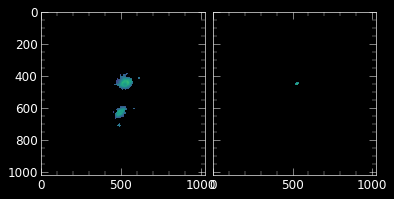

In [62]:
import matplotlib.pyplot as plt
plt.style.use('../paper_style.mplstyle')


fig,ax = plt.subplots(1,2,sharey=True)


with fits.open(f'{output}/{0}/1_0.fits') as hdulist:
    
    for i,img in enumerate(['ICL_STAR_DENSITY_Y','BCG_STAR_DENSITY_Y']):
        
        hdu = hdulist[img]
        data = hdu.data
        ax[i].imshow(np.log10(data))